# Cross-Day Plotting Examples (ITS, IVg, Transconductance)

This notebook demonstrates how to:
1. View chip history to identify experiments
2. Select specific seq numbers from different days
3. Combine and plot ITS, IVg, and transconductance data

**Key Point**: Use `seq` numbers (first column in history), NOT file_idx (#N at end)!

In [ ]:
from pathlib import Path
from src.timeline import print_chip_history
from src.plots import (
    combine_metadata_by_seq,
    plot_its_overlay,
    plot_ivg_sequence,
    plot_ivg_transconductance
)
from src.styles import set_plot_style

# Configuration
METADATA_DIR = Path("metadata")
RAW_DATA_DIR = Path(".")
CHIP_NUMBER = 67.0
CHIP_GROUP_NAME = "Alisson"

## Step 1: View Complete Chip History

This shows all experiments across all days with their file indices.

In [2]:
# View complete history for Alisson67
print_chip_history(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip_number=CHIP_NUMBER,
    chip_group_name="Alisson",
    proc_filter="It"  # Only show ITS experiments
)


Complete Experiment History: Alisson67.0
Total experiments: 41
Date range: 2025-10-14 to 2025-10-16

─── 2025-10-14 (2025-10-14) ──────────────────────────────────────────────────
   4  15:13:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=1.15 V  λ=455.0 nm  period=120.0 s  #10
   5  15:16:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=2.19 V  λ=455.0 nm  period=120.0 s  #11
   6  15:19:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=3.28 V  λ=455.0 nm  period=120.0 s  #12
   7  15:22:12  It  Alisson67  VG=-0.35 V  VDS=0.1 V  VL=4.41 V  λ=455.0 nm  period=120.0 s  #13
   9  16:10:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=1.15 V  λ=455.0 nm  period=120.0 s  #14
  10  16:13:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=2.29 V  λ=455.0 nm  period=120.0 s  #15
  11  16:16:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=3.28 V  λ=455.0 nm  period=120.0 s  #16
  12  16:19:44  It  Alisson67  VG=0.2 V  VDS=0.1 V  VL=4.41 V  λ=455.0 nm  period=120.0 s  #17
  15  16:39:10  It  Alisson67  VG=-0.35 V  VDS=0.1 

seq,date,time_hms,proc,summary,source_file,file_idx,start_time,day_folder
i64,str,str,str,str,str,i64,f64,str
4,"""2025-10-14""","""15:13:12""","""It""","""It Alisson67 VG=-0.35 V VDS…","""raw_data/2025-10-14/It2025-10-…",10,1.7605e9,"""2025-10-14"""
5,"""2025-10-14""","""15:16:12""","""It""","""It Alisson67 VG=-0.35 V VDS…","""raw_data/2025-10-14/It2025-10-…",11,1.7605e9,"""2025-10-14"""
6,"""2025-10-14""","""15:19:12""","""It""","""It Alisson67 VG=-0.35 V VDS…","""raw_data/2025-10-14/It2025-10-…",12,1.7605e9,"""2025-10-14"""
7,"""2025-10-14""","""15:22:12""","""It""","""It Alisson67 VG=-0.35 V VDS…","""raw_data/2025-10-14/It2025-10-…",13,1.7605e9,"""2025-10-14"""
9,"""2025-10-14""","""16:10:44""","""It""","""It Alisson67 VG=0.2 V VDS=0…","""raw_data/2025-10-14/It2025-10-…",14,1.7605e9,"""2025-10-14"""
…,…,…,…,…,…,…,…,…
58,"""2025-10-16""","""12:07:19""","""It""","""It Alisson67 VG=-0.4 V VDS=…","""raw_data/2025-10-16/It2025-10-…",2,1.7606e9,"""2025-10-16"""
59,"""2025-10-16""","""12:10:21""","""It""","""It Alisson67 VG=-0.4 V VDS=…","""raw_data/2025-10-16/It2025-10-…",3,1.7606e9,"""2025-10-16"""
60,"""2025-10-16""","""12:13:24""","""It""","""It Alisson67 VG=-0.4 V VDS=…","""raw_data/2025-10-16/It2025-10-…",4,1.7606e9,"""2025-10-16"""


## Step 2: Select Experiments by seq Number

**IMPORTANT**: Use the `seq` numbers (first column) from the history, NOT file_idx!

The file_idx (#1, #2, etc.) repeats across different days, but seq is unique across all days.

In [3]:
# Example: From the history above, note the seq numbers (first column)
# NOT the file_idx numbers (shown as #1, #2 at the end)

# For example, if history shows:
# seq  date        time     proc  summary
#  52  2025-10-15  10:47:50  ITS  Alisson67 ... #1   ← Use seq=52
#  57  2025-10-16  12:03:23  ITS  Alisson67 ... #1   ← Use seq=57 (different day, same file_idx!)
#  58  2025-10-16  12:07:19  ITS  Alisson67 ... #2   ← Use seq=58

selected_seq_numbers = [52, 57, 58]  # Adjust based on YOUR history output

## Step 3: Combine Metadata by seq Numbers

This function:
- Builds the chip history automatically
- Finds the experiments matching your seq numbers
- Loads the right metadata files
- Combines results in chronological order

In [4]:
# Combine selected experiments using seq numbers
meta = combine_metadata_by_seq(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip=CHIP_NUMBER,
    seq_numbers=selected_seq_numbers,
    chip_group_name=CHIP_GROUP_NAME
)

# Preview what was combined
print(f"\nCombined {meta.height} experiments")

# Show key columns if data exists
if meta.height > 0:
    display_cols = ["proc", "source_file"]
    if "VG" in meta.columns:
        display_cols.append("VG")
    if "Laser wavelength" in meta.columns:
        display_cols.append("Laser wavelength")
    print(meta.select(display_cols))

[info] combined 3 experiment(s) from 2 day(s)
[info] using 32 common column(s)

Combined 3 experiments
shape: (3, 4)
┌──────┬─────────────────────────────────┬──────┬──────────────────┐
│ proc ┆ source_file                     ┆ VG   ┆ Laser wavelength │
│ ---  ┆ ---                             ┆ ---  ┆ ---              │
│ str  ┆ str                             ┆ f64  ┆ f64              │
╞══════╪═════════════════════════════════╪══════╪══════════════════╡
│ ITS  ┆ raw_data/2025-10-15/It2025-10-… ┆ -0.4 ┆ 365.0            │
│ ITS  ┆ raw_data/2025-10-16/It2025-10-… ┆ -0.4 ┆ 365.0            │
│ ITS  ┆ raw_data/2025-10-16/It2025-10-… ┆ -0.4 ┆ 365.0            │
└──────┴─────────────────────────────────┴──────┴──────────────────┘


## Step 4: Plot Combined ITS Overlay

Now use your existing plotting workflow - the combined metadata works exactly like before!

findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found 

saved figs/chip67_ITS_overlay_cross_day_analysis.png


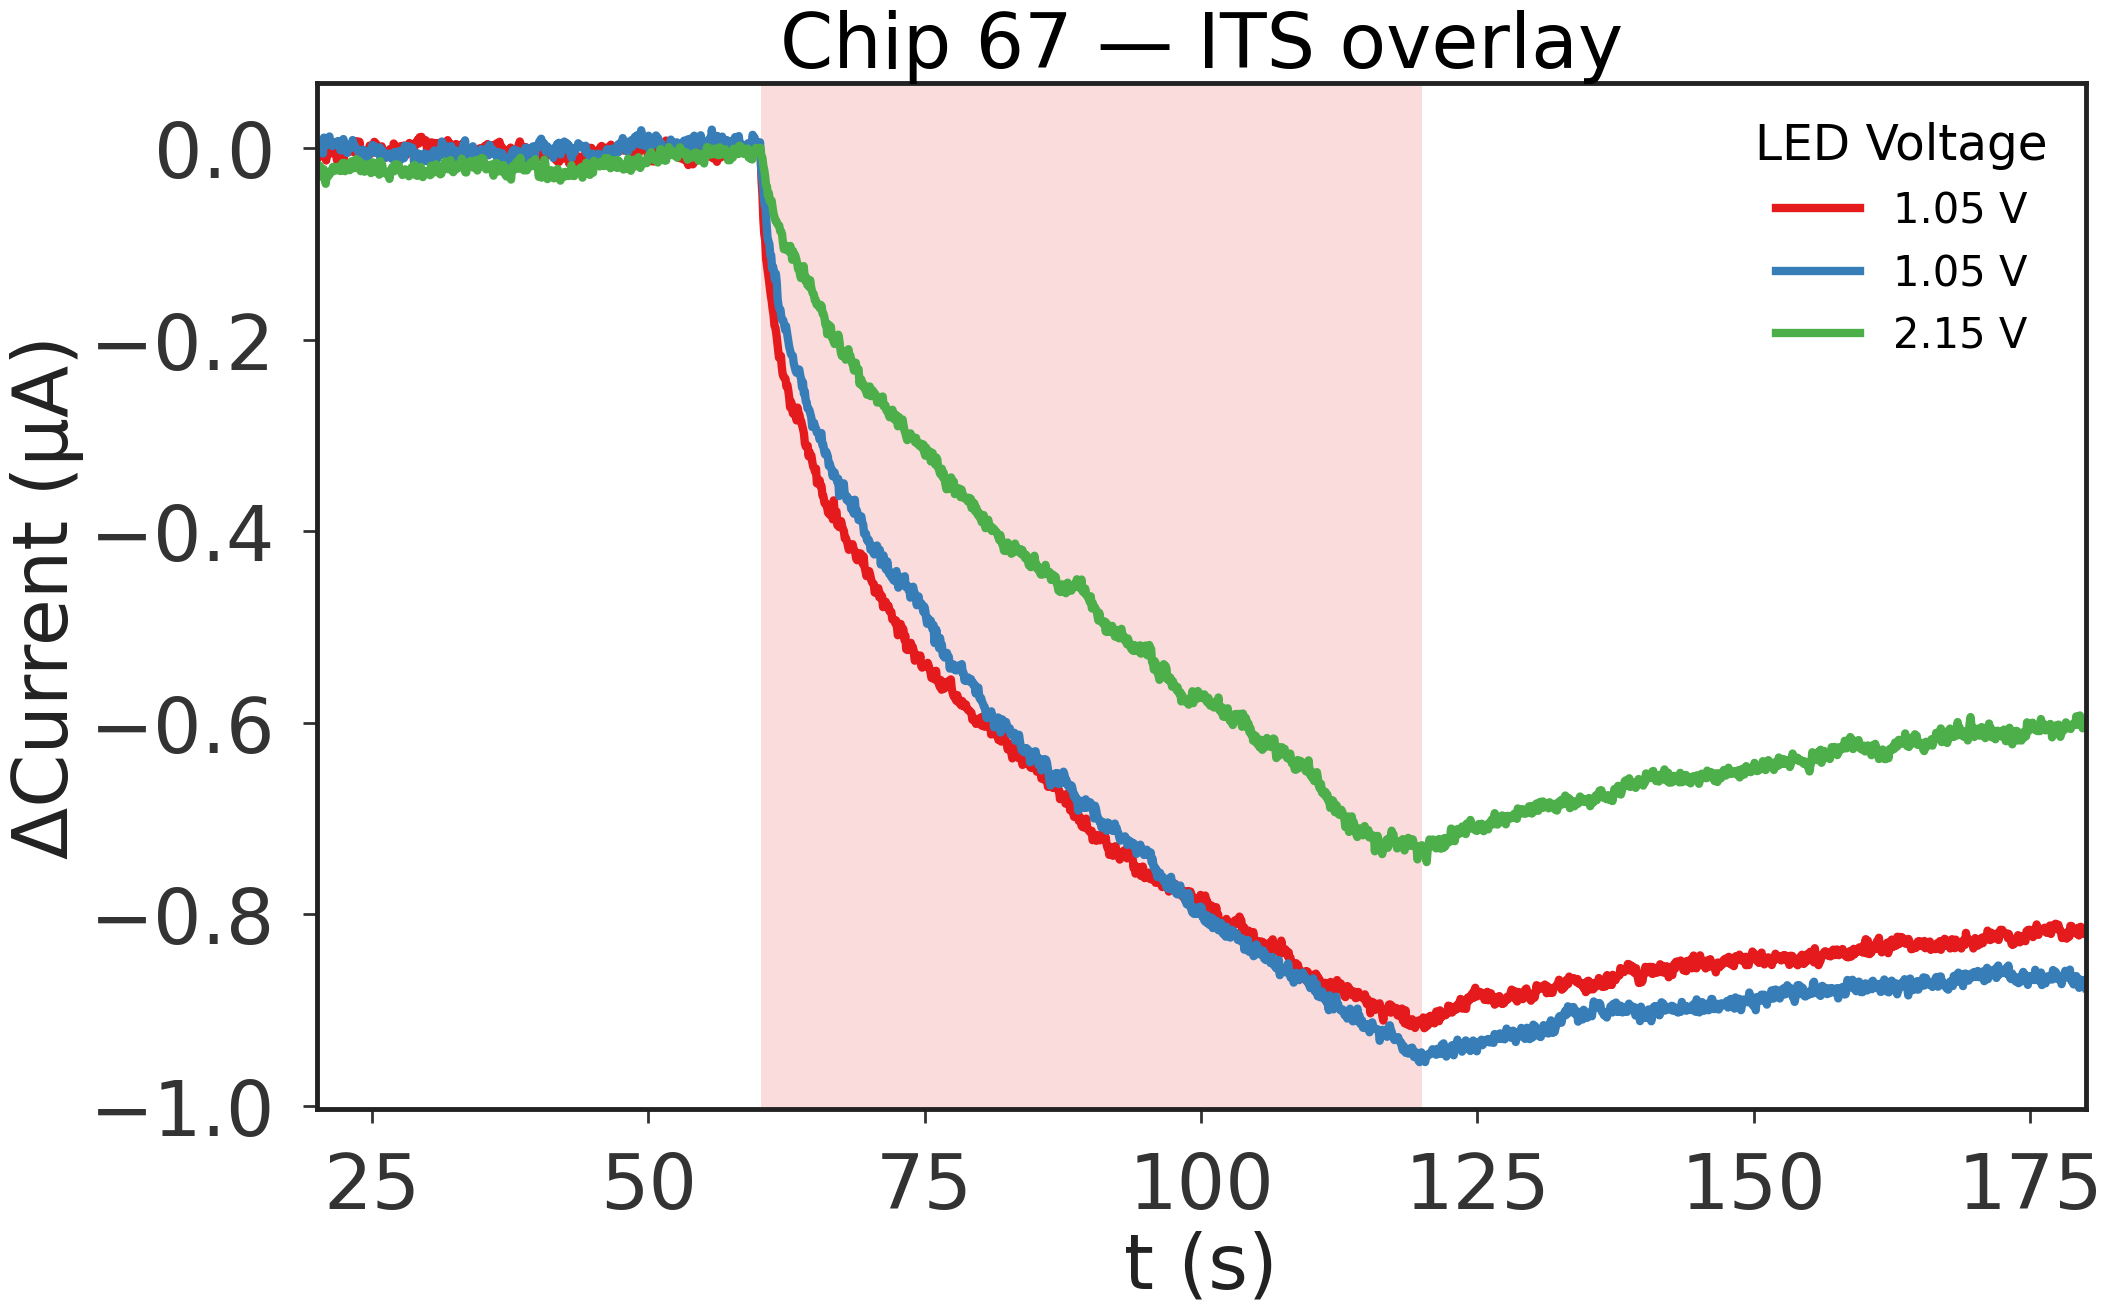

In [5]:

# Plot the combined selection
plot_its_overlay(
    meta,
    Path("."),
    tag="cross_day_analysis",
    legend_by="led_voltage",  # or "wavelength", "vg", etc.
    padding=0.05
)

## Alternative: Single Day (Your Original Workflow)

For comparison, here's your original single-day workflow:

findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Sans Pro Black, Source Sans 3
findfont: Generic family 'sans-serif' not found 

saved figs/chip67_ITS_overlay_single_day_analysis.png


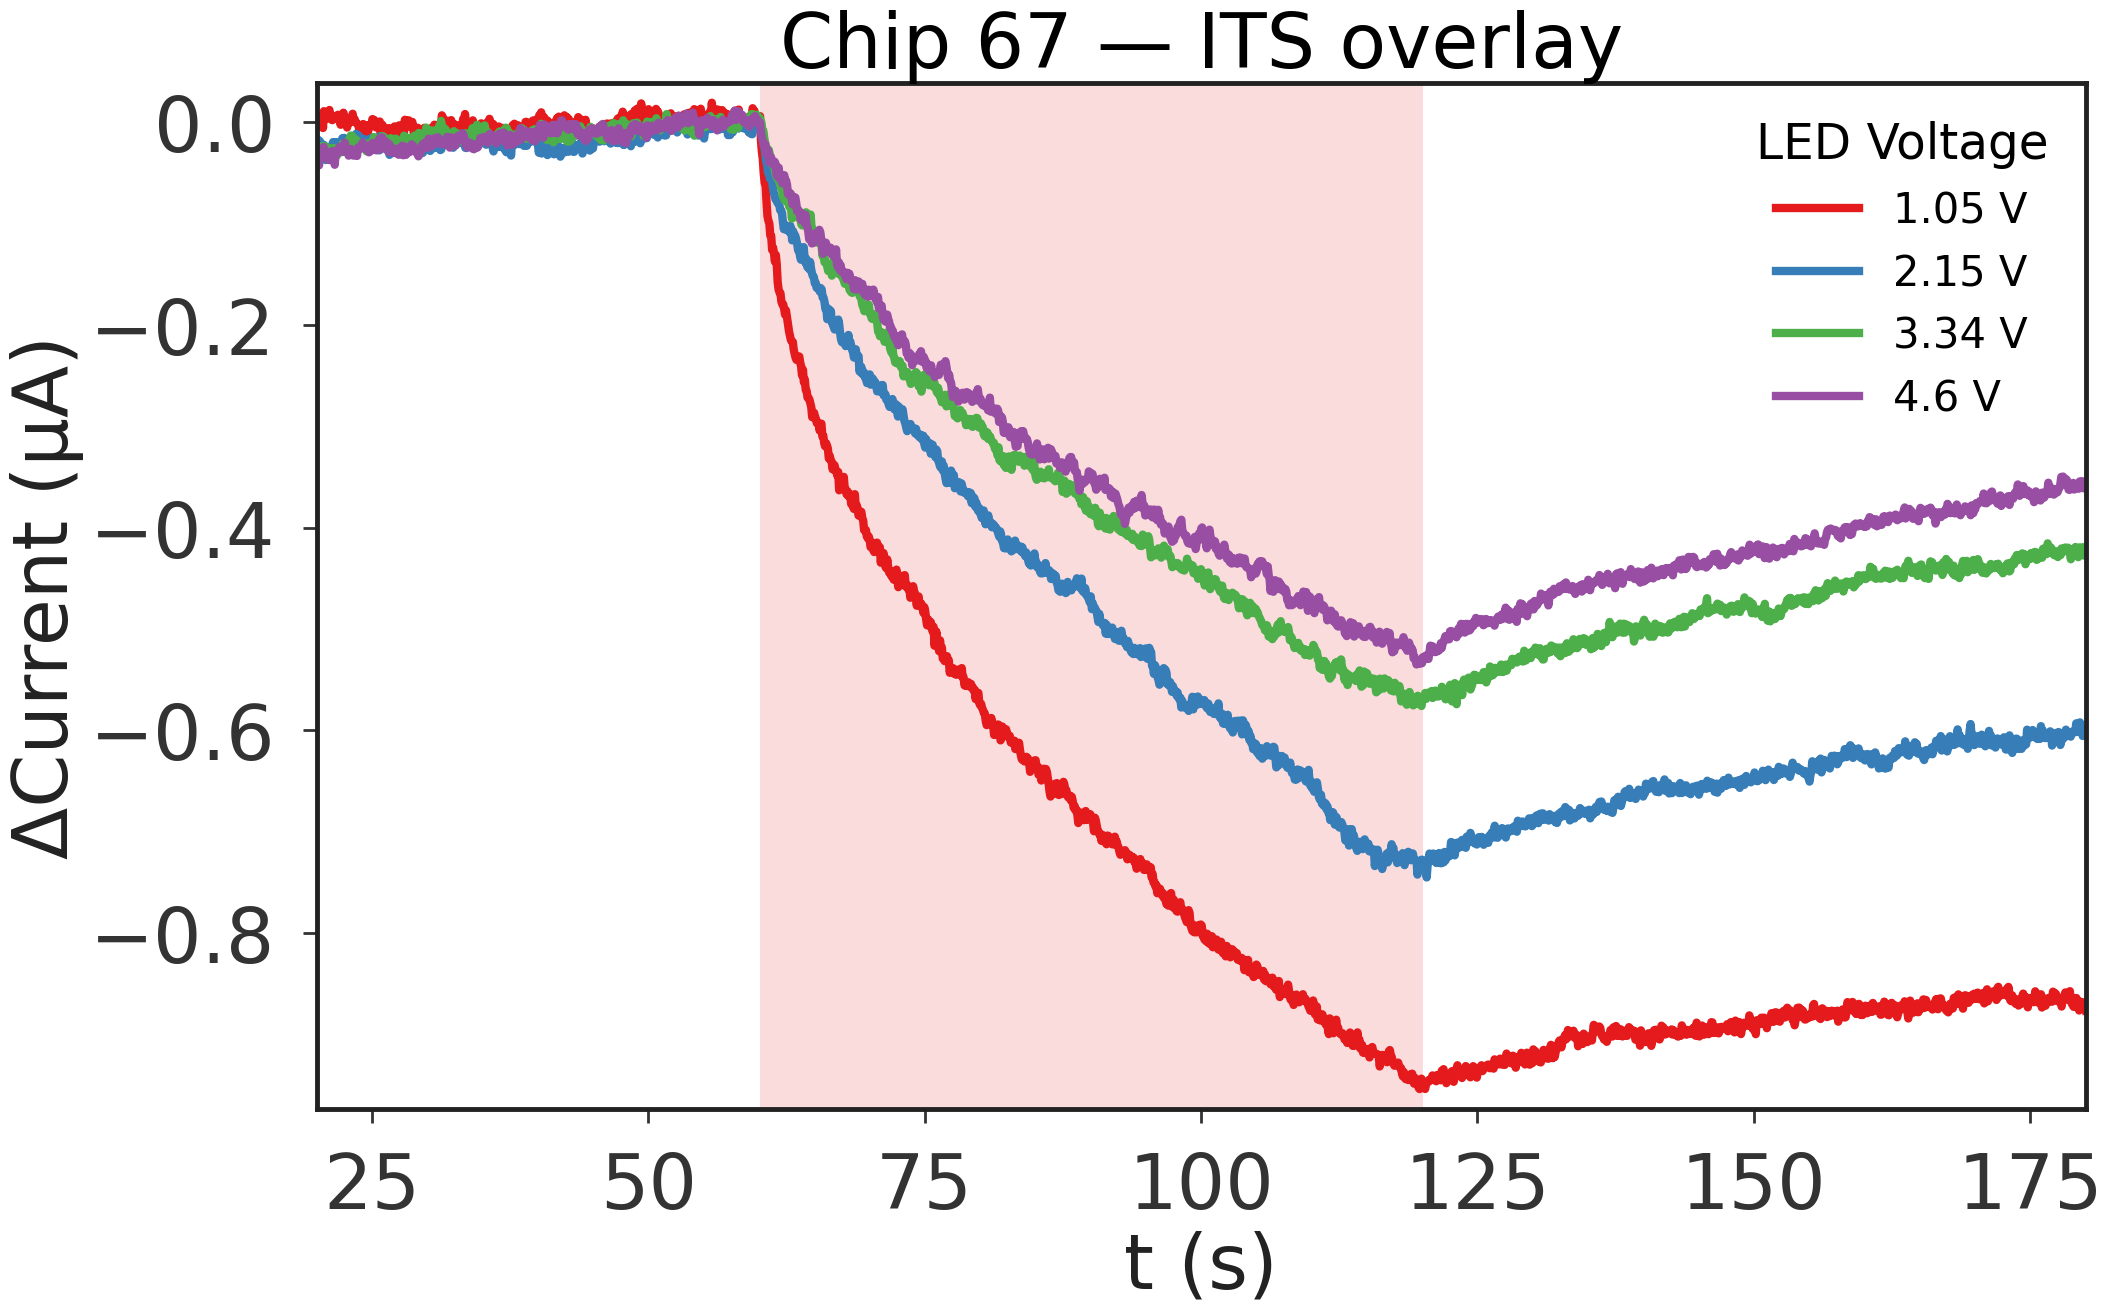

In [6]:
from src.plots import load_and_prepare_metadata
import polars as pl

# Single day filtering (your original workflow)
METADATA_CSV = "metadata/2025-10-16/metadata.csv"
meta_single = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)

# Use file_idx for filtering within a single day
good_file_idx = [1, 2, 3, 4]  # This works within one day
meta_filtered = meta_single.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_file_idx)
)

plot_its_overlay(
    meta_filtered,
    RAW_DATA_DIR,
    tag="single_day_analysis",
    legend_by="led_voltage"
)

## Quick Reference

### When to use seq vs file_idx

- **Cross-day analysis**: Use `seq` numbers from `print_chip_history()` with `combine_metadata_by_seq()`
  - seq is unique across all days
  - Example: seq 52, 57, 58 might come from different days

- **Single-day analysis**: Use `file_idx` with `load_and_prepare_metadata()` + filter
  - file_idx is the number in the filename (e.g., Alisson67_15.csv → file_idx=15)
  - Only unique within one day

### Legend Options
- `legend_by="led_voltage"` - Group by laser voltage
- `legend_by="wavelength"` - Group by wavelength  
- `legend_by="vg"` - Group by gate voltage
- `legend_by="date"` - Group by date (useful for cross-day)

### Tips
1. **Always look at the seq column** (first column) when selecting from chip history
2. The `#N` at the end of the summary is file_idx - it repeats across days!
3. For cross-day: use `combine_metadata_by_seq()` with metadata_dir
4. For single-day: use your original workflow with file_idx

---

## Summary

The `combine_metadata_by_seq()` function works with **ALL plot types**:

| Plot Type | Function | Input |
|-----------|----------|-------|
| **ITS overlay** | `plot_its_overlay()` | ITS metadata |
| **IVg sequence** | `plot_ivg_sequence()` | IVg metadata |
| **Transconductance** | `plot_ivg_transconductance()` | IVg metadata |
| **ITS delta** | `plot_its_by_vg_delta()` | ITS metadata |

**Key workflow**:
1. View history with `print_chip_history()` (use `proc_filter` to narrow down)
2. Note the **seq numbers** (first column)
3. Combine with `combine_metadata_by_seq(seq_numbers=[...])`
4. Plot with any plotting function

**Remember**: Always use `seq` for cross-day, `file_idx` only for single-day!

In [ ]:
# Use the same IVg metadata from above
if meta_ivg.height > 0:
    plot_ivg_transconductance(
        meta_ivg,
        RAW_DATA_DIR,
        tag="cross_day_transconductance"
    )
    print("✓ Transconductance plot saved")

---

## Cross-Day Transconductance Analysis

Transconductance (gm = dI/dVG) uses the same IVg metadata:

In [ ]:
# Step 4: Plot IVg sequence
set_plot_style('prism_rain')

if meta_ivg.height > 0:
    plot_ivg_sequence(
        meta_ivg,
        RAW_DATA_DIR,
        tag="cross_day_ivg_evolution"
    )

In [ ]:
# Step 2: Select IVg measurements by seq (adjust based on your history)
# Example: If history shows seq 2, 8, 14, 20 for IVg measurements
selected_ivg_seq = [2, 8, 14]  # Adjust based on YOUR history

# Step 3: Combine
meta_ivg = combine_metadata_by_seq(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip=CHIP_NUMBER,
    seq_numbers=selected_ivg_seq,
    chip_group_name=CHIP_GROUP_NAME
)

print(f"Combined {meta_ivg.height} IVg measurements")

In [ ]:
# Step 1: View IVg history
print_chip_history(
    metadata_dir=METADATA_DIR,
    raw_data_dir=RAW_DATA_DIR,
    chip_number=int(CHIP_NUMBER),
    chip_group_name=CHIP_GROUP_NAME,
    proc_filter="IVg"  # Only show IVg measurements
)

---

## Cross-Day IVg Analysis

The same workflow works for IVg measurements!